In [176]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import KFold, train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.metrics import precision_score, recall_score, accuracy_score

In [110]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [111]:
print(train.head())

   id  feat_1  feat_2  feat_3  feat_4  feat_5  feat_6  feat_7  feat_8  feat_9  \
0   1       1       0       0       0       0       0       0       0       0   
1   2       0       0       0       0       0       0       0       1       0   
2   3       0       0       0       0       0       0       0       1       0   
3   4       1       0       0       1       6       1       5       0       0   
4   5       0       0       0       0       0       0       0       0       0   

   ...  feat_85  feat_86  feat_87  feat_88  feat_89  feat_90  feat_91  \
0  ...        1        0        0        0        0        0        0   
1  ...        0        0        0        0        0        0        0   
2  ...        0        0        0        0        0        0        0   
3  ...        0        1        2        0        0        0        0   
4  ...        1        0        0        0        0        1        0   

   feat_92  feat_93   target  
0        0        0  Class_1  
1        0  

In [112]:
print(test.head())

   id  feat_1  feat_2  feat_3  feat_4  feat_5  feat_6  feat_7  feat_8  feat_9  \
0   1       0       0       0       0       0       0       0       0       0   
1   2       2       2      14      16       0       0       0       0       0   
2   3       0       1      12       1       0       0       0       0       0   
3   4       0       0       0       1       0       0       0       0       0   
4   5       1       0       0       1       0       0       1       2       0   

   ...  feat_84  feat_85  feat_86  feat_87  feat_88  feat_89  feat_90  \
0  ...        0        0       11        1       20        0        0   
1  ...        0        0        0        0        0        4        0   
2  ...        0        0        0        0        2        0        0   
3  ...        0        3        1        0        0        0        0   
4  ...        0        0        0        0        0        0        0   

   feat_91  feat_92  feat_93  
0        0        0        0  
1        0  

In [113]:
train["target"] = train["target"].astype("category").cat.codes
print(train.head())

   id  feat_1  feat_2  feat_3  feat_4  feat_5  feat_6  feat_7  feat_8  feat_9  \
0   1       1       0       0       0       0       0       0       0       0   
1   2       0       0       0       0       0       0       0       1       0   
2   3       0       0       0       0       0       0       0       1       0   
3   4       1       0       0       1       6       1       5       0       0   
4   5       0       0       0       0       0       0       0       0       0   

   ...  feat_85  feat_86  feat_87  feat_88  feat_89  feat_90  feat_91  \
0  ...        1        0        0        0        0        0        0   
1  ...        0        0        0        0        0        0        0   
2  ...        0        0        0        0        0        0        0   
3  ...        0        1        2        0        0        0        0   
4  ...        1        0        0        0        0        1        0   

   feat_92  feat_93  target  
0        0        0       0  
1        0    

In [114]:
X = train.iloc[:, 1:94]
print(X)
y = train.iloc[:, 94]
print(y)

       feat_1  feat_2  feat_3  feat_4  feat_5  feat_6  feat_7  feat_8  feat_9  \
0           1       0       0       0       0       0       0       0       0   
1           0       0       0       0       0       0       0       1       0   
2           0       0       0       0       0       0       0       1       0   
3           1       0       0       1       6       1       5       0       0   
4           0       0       0       0       0       0       0       0       0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
61873       1       0       0       1       1       0       0       0       0   
61874       4       0       0       0       0       0       0       0       0   
61875       0       0       0       0       0       0       0       3       1   
61876       1       0       0       0       0       0       0       0       0   
61877       0       0       0       0       0       0       0       0       0   

       feat_10  ...  feat_8

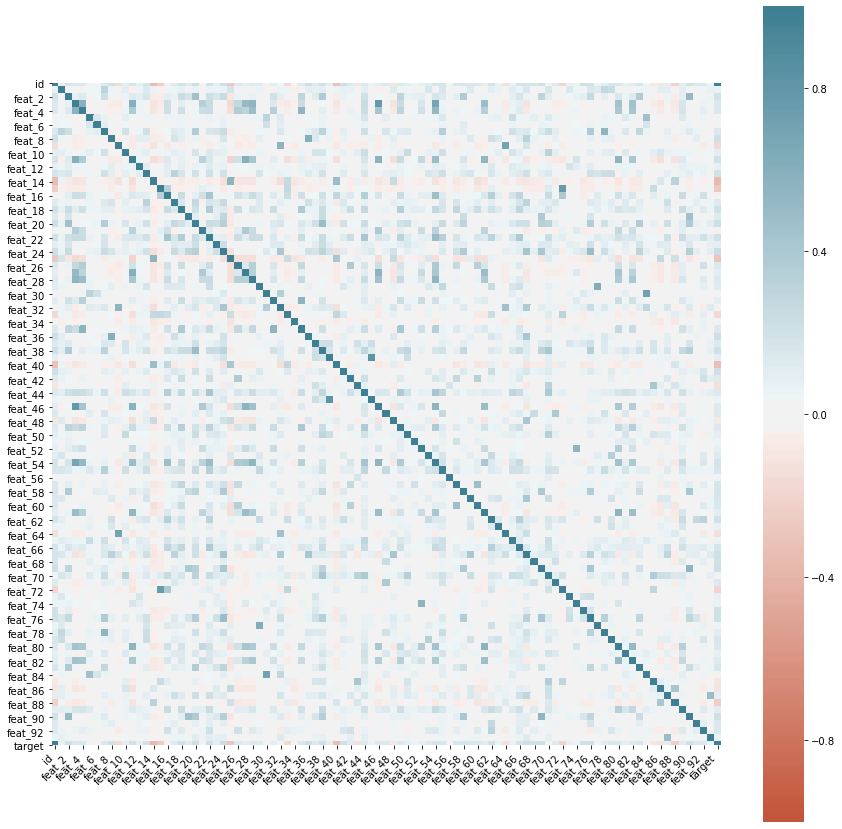

In [231]:
plt.figure(figsize = (15,15))
corr = train.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [115]:
skewvalues = X.skew()
print(skewvalues)

feat_1     12.900320
feat_2     11.323788
feat_3      5.305196
feat_4      8.635398
feat_5     13.309477
             ...    
feat_89    11.615028
feat_90    10.407984
feat_91    14.105234
feat_92     4.953746
feat_93    33.766676
Length: 93, dtype: float64


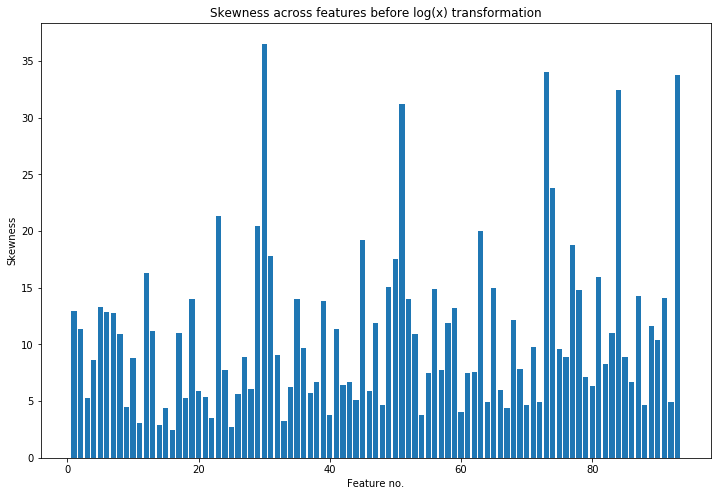

In [233]:
plt.figure(figsize = (12,8))
plt.bar([i for i in range(1, 94)], skewvalues)
plt.xlabel("Feature no.")
plt.ylabel("Skewness")
plt.title("Skewness across features before log(x) transformation")
plt.show()   

In [116]:
X_log = X.transform(lambda x : np.log(x + 1))

In [117]:
print(X_log)

         feat_1  feat_2  feat_3    feat_4    feat_5    feat_6    feat_7  \
0      0.693147     0.0     0.0  0.000000  0.000000  0.000000  0.000000   
1      0.000000     0.0     0.0  0.000000  0.000000  0.000000  0.000000   
2      0.000000     0.0     0.0  0.000000  0.000000  0.000000  0.000000   
3      0.693147     0.0     0.0  0.693147  1.945910  0.693147  1.791759   
4      0.000000     0.0     0.0  0.000000  0.000000  0.000000  0.000000   
...         ...     ...     ...       ...       ...       ...       ...   
61873  0.693147     0.0     0.0  0.693147  0.693147  0.000000  0.000000   
61874  1.609438     0.0     0.0  0.000000  0.000000  0.000000  0.000000   
61875  0.000000     0.0     0.0  0.000000  0.000000  0.000000  0.000000   
61876  0.693147     0.0     0.0  0.000000  0.000000  0.000000  0.000000   
61877  0.000000     0.0     0.0  0.000000  0.000000  0.000000  0.000000   

         feat_8    feat_9   feat_10  ...   feat_84   feat_85   feat_86  \
0      0.000000  0.000000

In [118]:
skew_log = X_log.skew()
print(skew_log)

feat_1     2.913842
feat_2     3.900972
feat_3     2.541053
feat_4     2.518273
feat_5     5.772432
             ...   
feat_89    2.426197
feat_90    3.915315
feat_91    5.793871
feat_92    2.129729
feat_93    6.175552
Length: 93, dtype: float64


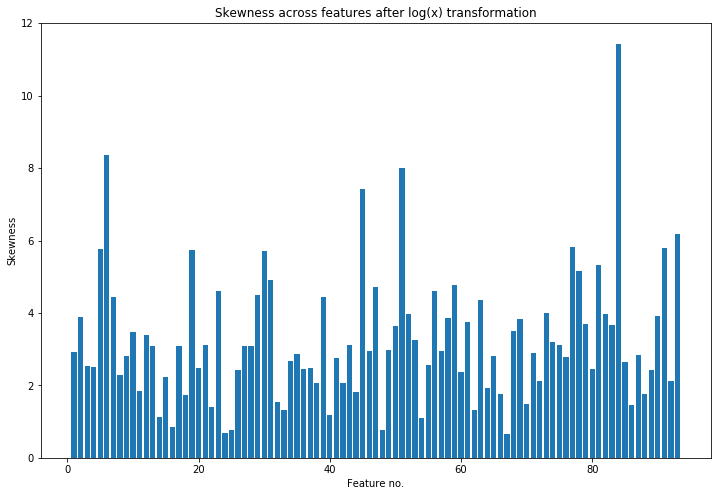

In [234]:
plt.figure(figsize = (12,8))
plt.bar([i for i in range(1, 94)], skew_log)
plt.xlabel("Feature no.")
plt.ylabel("Skewness")
plt.title("Skewness across features after log(x) transformation")
plt.show()    

In [177]:
X_train, X_test, y_train, y_test = train_test_split(X_log, y, test_size = 0.2, random_state = 42)

In [85]:
rf = RandomForestClassifier(n_estimators = 200)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [86]:
rf.score(X_test, y_test)

0.8130252100840336

In [87]:
rf.feature_importances_

array([0.0071359 , 0.00342464, 0.01018528, 0.0103301 , 0.00188325,
       0.00084351, 0.00334913, 0.01477526, 0.01322864, 0.00408629,
       0.04562777, 0.00243301, 0.00609411, 0.03217295, 0.02504023,
       0.0115394 , 0.00885038, 0.0058044 , 0.00427078, 0.00713479,
       0.0038715 , 0.00628621, 0.0033154 , 0.01919118, 0.0283816 ,
       0.02845581, 0.01029887, 0.00354006, 0.00440221, 0.00916933,
       0.00179537, 0.0130848 , 0.01177822, 0.04523972, 0.00877762,
       0.01817753, 0.00602642, 0.00761943, 0.01188029, 0.03072669,
       0.00734754, 0.02235879, 0.01325344, 0.00523791, 0.00385253,
       0.00598521, 0.00771632, 0.01829177, 0.00299219, 0.00795598,
       0.00110576, 0.00289152, 0.01023598, 0.01044086, 0.00505189,
       0.00667972, 0.01144981, 0.00651147, 0.00886594, 0.03796799,
       0.00852916, 0.01993797, 0.00278457, 0.0150552 , 0.00354412,
       0.00698691, 0.02341959, 0.01266575, 0.01635372, 0.01042159,
       0.00793009, 0.01424892, 0.00523343, 0.00508984, 0.01627

In [91]:
bg = BaggingClassifier(DecisionTreeClassifier(), max_samples = 0.5, max_features = 1.0, n_estimators = 200)
bg.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,


In [93]:
bg.score(X_test, y_test)

0.7984001292824823

In [96]:
adb = AdaBoostClassifier(DecisionTreeClassifier(), learning_rate = 0.1, n_estimators = 200)
adb.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                       

In [97]:
adb.score(X_test, y_test)

0.7130736910148675

In [98]:
adb.score(X_train, y_train)

1.0

In [171]:
lr = LogisticRegression(max_iter = 10000)
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [172]:
pred = lr.predict(X_test)
accuracy_score(y_test, pred)

0.41414141414141414

In [191]:
kf = KFold(n_splits = 5, random_state = 5, shuffle = True)

accuracy_lr = []
accuracy_rf = []
accuracy_bg = []
accuracy_gbc = []
accuracy_xgb = []
accuracy_evc = []

# Iterate over each train-test split
for train_index, test_index in kf.split(X_log):
    # Split train-test
    X_train, X_test = X_log.iloc[train_index], X_log.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Train the model
    m_lr = LogisticRegression(max_iter = 10000)
    m_lr.fit(X_train, y_train)
    accuracy_lr.append(accuracy_score(y_test, m_lr.predict(X_test)))
    
    m_rf = RandomForestClassifier(n_estimators = 200)
    m_rf.fit(X_train, y_train)
    accuracy_rf.append(m_rf.score(X_test, y_test))
    
    m_bg = BaggingClassifier(DecisionTreeClassifier(), max_samples = 0.5, max_features = 1.0, n_estimators = 200)
    m_bg.fit(X_train, y_train)
    accuracy_bg.append(m_bg.score(X_test, y_test))
    
    m_gbc = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 10, random_state = 0)
    m_gbc.fit(X_train, y_train)
    accuracy_gbc.append(m_gbc.score(X_test, y_test))
    
    m_clf = xgb.XGBClassifier()
    m_clf.fit(X_train, y_train)
    accuracy_xgb.append(m_clf.score(X_test, y_test))
    
    m_evc = VotingClassifier(estimators= [('lr', m_lr), ('rf', m_rf), ('bg', m_bg), ("clf", m_clf), ('gbc', m_gbc)], voting = 'hard')
    m_evc.fit(X_train,y_train)
    accuracy_evc.append(m_evc.score(X_test, y_test))

print("Accuracy LR")
print(accuracy_lr)
print("Accuracy RF")
print(accuracy_rf)
print("Accuracy BG")
print(accuracy_bg)
print("Accuracy GBC")
print(accuracy_gbc)
print("Accuracy XGB")
print(accuracy_xgb)
print("Accuracy EVC")
print(accuracy_evc)

Accuracy LR
[0.7652714932126696, 0.7634938590820943, 0.7581609566903684, 0.7654141414141414, 0.7558787878787879]
Accuracy RF
[0.8145604395604396, 0.8159340659340659, 0.8073691014867486, 0.8142222222222222, 0.806949494949495]
Accuracy BG
[0.7975921137685844, 0.8023594053005818, 0.794683257918552, 0.8004040404040405, 0.7951515151515152]
Accuracy GBC
[0.8171460892049127, 0.8164188752424046, 0.8138332255979315, 0.8228686868686869, 0.8107474747474748]
Accuracy XGB
[0.8160148674854557, 0.8114899806076277, 0.8141564318034906, 0.8187474747474748, 0.808]
Accuracy EVC
[0.8197317388493859, 0.8146412411118293, 0.8179541047188106, 0.8211717171717172, 0.8095353535353536]


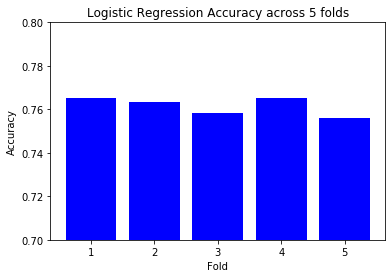

In [237]:
plt.bar([i for i in range(1, 6)], accuracy_lr, color = "blue")
plt.ylim([0.7, 0.8])
plt.xlabel("Fold")
plt.xticks(np.arange(1, 6))
plt.ylabel("Accuracy")
plt.title("Logistic Regression Accuracy across 5 folds")
plt.show()

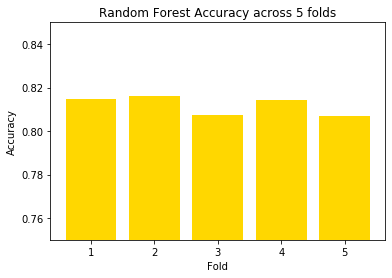

In [239]:
plt.bar([i for i in range(1, 6)], accuracy_rf, color = "gold")
plt.ylim([0.75, 0.85])
plt.xlabel("Fold")
plt.xticks(np.arange(1, 6))
plt.ylabel("Accuracy")
plt.title("Random Forest Accuracy across 5 folds")
plt.show()

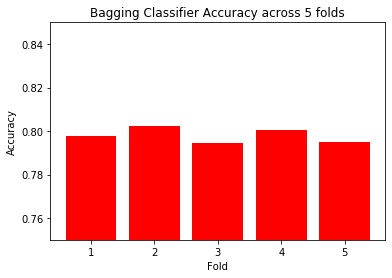

In [241]:
plt.bar([i for i in range(1, 6)], accuracy_bg, color = "red")
plt.ylim([0.75, 0.85])
plt.xlabel("Fold")
plt.xticks(np.arange(1, 6))
plt.ylabel("Accuracy")
plt.title("Bagging Classifier Accuracy across 5 folds")
plt.show()

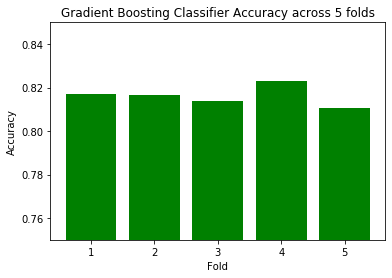

In [242]:
plt.bar([i for i in range(1, 6)], accuracy_gbc, color = "green")
plt.ylim([0.75, 0.85])
plt.xlabel("Fold")
plt.xticks(np.arange(1, 6))
plt.ylabel("Accuracy")
plt.title("Gradient Boosting Classifier Accuracy across 5 folds")
plt.show()

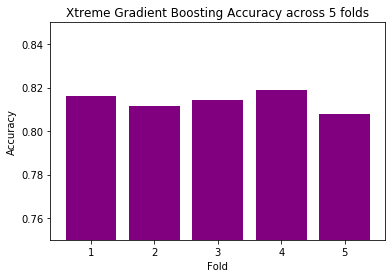

In [245]:
plt.bar([i for i in range(1, 6)], accuracy_xgb, color = "purple")
plt.ylim([0.75, 0.85])
plt.xlabel("Fold")
plt.xticks(np.arange(1, 6))
plt.ylabel("Accuracy")
plt.title("Xtreme Gradient Boosting Accuracy across 5 folds")
plt.show()

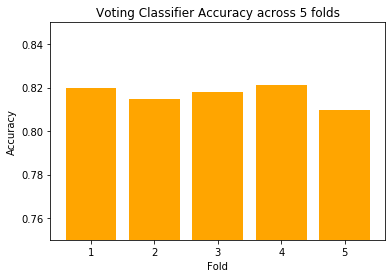

In [249]:
plt.bar([i for i in range(1, 6)], accuracy_evc, color = "Orange")
plt.ylim([0.75, 0.85])
plt.xlabel("Fold")
plt.xticks(np.arange(1, 6))
plt.ylabel("Accuracy")
plt.title("Voting Classifier Accuracy across 5 folds")
plt.show()

In [186]:
gbc = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 10, random_state = 0)
gbc.fit(X_train, y_train)
gbc.score(X_test, y_test)

0.807207498383969

In [165]:
evc.score(X_test, y_test)

0.8099547511312217

In [184]:
clf = xgb.XGBClassifier()
clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)

In [185]:
clf.score(X_test, y_test)

0.8159340659340659

In [156]:
y_pred = clf.predict(X_test)

In [158]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.8159340659340659


In [195]:
evc = VotingClassifier(estimators= [('lr', lr), ('rf', rf), ('bg', bg), ("clf", clf), ('gbc', gbc)], voting = 'hard')
print(evc)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=10000,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,...
                                        

In [ ]:
evc.fit(X_train,y_train)
evc.score(X_test, y_test)

In [198]:
kf = KFold(n_splits = 5, random_state = 7, shuffle = True)

# Train the model
m_lr = LogisticRegression(max_iter = 10000)
m_rf = RandomForestClassifier(n_estimators = 200)
m_bg = BaggingClassifier(DecisionTreeClassifier(), max_samples = 0.5, max_features = 1.0, n_estimators = 200)
m_gbc = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 10, random_state = 0)    
m_clf = xgb.XGBClassifier()
m_evc = VotingClassifier(estimators= [('lr', m_lr), ('rf', m_rf), ('bg', m_bg), ("clf", m_clf), ('gbc', m_gbc)], voting = 'hard')
    
for train_index, test_index in kf.split(X_log):
    # Split train-test
    X_train, X_test = X_log.iloc[train_index], X_log.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    m_lr.fit(X_train, y_train)
    m_rf.fit(X_train, y_train)
    m_bg.fit(X_train, y_train)
    m_gbc.fit(X_train, y_train)
    m_clf.fit(X_train, y_train)
    m_evc.fit(X_train, y_train)


In [199]:
test = test.iloc[:, 1:]

In [200]:
print(test.head())

   feat_1  feat_2  feat_3  feat_4  feat_5  feat_6  feat_7  feat_8  feat_9  \
0       0       0       0       0       0       0       0       0       0   
1       2       2      14      16       0       0       0       0       0   
2       0       1      12       1       0       0       0       0       0   
3       0       0       0       1       0       0       0       0       0   
4       1       0       0       1       0       0       1       2       0   

   feat_10  ...  feat_84  feat_85  feat_86  feat_87  feat_88  feat_89  \
0        3  ...        0        0       11        1       20        0   
1        0  ...        0        0        0        0        0        4   
2        0  ...        0        0        0        0        2        0   
3        0  ...        0        3        1        0        0        0   
4        3  ...        0        0        0        0        0        0   

   feat_90  feat_91  feat_92  feat_93  
0        0        0        0        0  
1        0        

In [202]:
test_log = test.transform(lambda x : np.log(x + 1))
print(test_log.head())

     feat_1    feat_2    feat_3    feat_4  feat_5  feat_6    feat_7    feat_8  \
0  0.000000  0.000000  0.000000  0.000000     0.0     0.0  0.000000  0.000000   
1  1.098612  1.098612  2.708050  2.833213     0.0     0.0  0.000000  0.000000   
2  0.000000  0.693147  2.564949  0.693147     0.0     0.0  0.000000  0.000000   
3  0.000000  0.000000  0.000000  0.693147     0.0     0.0  0.000000  0.000000   
4  0.693147  0.000000  0.000000  0.693147     0.0     0.0  0.693147  1.098612   

   feat_9   feat_10  ...  feat_84   feat_85   feat_86   feat_87   feat_88  \
0     0.0  1.386294  ...      0.0  0.000000  2.484907  0.693147  3.044522   
1     0.0  0.000000  ...      0.0  0.000000  0.000000  0.000000  0.000000   
2     0.0  0.000000  ...      0.0  0.000000  0.000000  0.000000  1.098612   
3     0.0  0.000000  ...      0.0  1.386294  0.693147  0.000000  0.000000   
4     0.0  1.386294  ...      0.0  0.000000  0.000000  0.000000  0.000000   

    feat_89  feat_90   feat_91   feat_92   feat_93

In [205]:
m_evc = VotingClassifier(estimators= [('lr', m_lr), ('rf', m_rf), ('bg', m_bg), ("clf", m_clf), ('gbc', m_gbc)], voting = 'soft', weights = [1, 5, 4, 8, 8])
m_evc.fit(X_log, y)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=10000,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,...
                                        

In [206]:
preds = m_evc.predict_proba(test_log)

In [209]:
preds = preds.round(3)

In [210]:
print(preds)

[[0.003 0.147 0.242 ... 0.014 0.002 0.002]
 [0.013 0.051 0.034 ... 0.025 0.3   0.012]
 [0.001 0.    0.    ... 0.    0.002 0.   ]
 ...
 [0.003 0.488 0.335 ... 0.015 0.004 0.003]
 [0.    0.491 0.052 ... 0.001 0.001 0.   ]
 [0.001 0.457 0.435 ... 0.044 0.001 0.   ]]


In [211]:
print(preds.shape)

(144368, 9)


In [212]:
print(preds[0])

[0.003 0.147 0.242 0.576 0.001 0.013 0.014 0.002 0.002]


In [213]:
df = pd.DataFrame(preds, columns = ["Class_1", "Class_2", "Class_3", "Class_4", "Class_5", "Class_6", "Class_7", "Class_8", "Class_9"])

In [215]:
test_og = pd.read_csv("test.csv")

df["id"] = test_og["id"]
cols = list(df.columns)
cols = [cols[-1]] + cols[:-1]
df = df[cols]
print(df.head())

   id  Class_1  Class_2  Class_3  Class_4  Class_5  Class_6  Class_7  Class_8  \
0   1    0.003    0.147    0.242    0.576    0.001    0.013    0.014    0.002   
1   2    0.013    0.051    0.034    0.021    0.002    0.541    0.025    0.300   
2   3    0.001    0.000    0.000    0.000    0.000    0.997    0.000    0.002   
3   4    0.003    0.645    0.289    0.027    0.000    0.001    0.003    0.001   
4   5    0.106    0.000    0.001    0.000    0.000    0.013    0.021    0.138   

   Class_9  
0    0.002  
1    0.012  
2    0.000  
3    0.030  
4    0.721  


In [216]:
df.to_csv("submission.csv", encoding='utf-8', index=False)

In [217]:
m_evc = VotingClassifier(estimators= [('lr', m_lr), ('rf', m_rf), ('bg', m_bg), ("clf", m_clf), ('gbc', m_gbc)], voting = 'soft', weights = [1, 5, 4, 8, 8])
for train_index, test_index in kf.split(X_log):
    
    X_train, X_test = X_log.iloc[train_index], X_log.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    m_evc.fit(X_train, y_train)

In [218]:
preds = m_evc.predict_proba(test_log)
preds = preds.round(3)
print(preds)

[[0.002 0.156 0.153 ... 0.012 0.004 0.   ]
 [0.011 0.049 0.035 ... 0.013 0.276 0.012]
 [0.    0.    0.    ... 0.    0.001 0.   ]
 ...
 [0.002 0.615 0.241 ... 0.024 0.005 0.004]
 [0.    0.482 0.045 ... 0.002 0.    0.   ]
 [0.    0.47  0.394 ... 0.076 0.002 0.   ]]


In [219]:
print(preds[0])

[0.002 0.156 0.153 0.665 0.    0.008 0.012 0.004 0.   ]


In [221]:
df1 = pd.DataFrame(preds, columns = ["Class_1", "Class_2", "Class_3", "Class_4", "Class_5", "Class_6", "Class_7", "Class_8", "Class_9"])

df1["id"] = test_og["id"]
cols = list(df1.columns)
cols = [cols[-1]] + cols[:-1]
df1 = df1[cols]
print(df1.head())

   id  Class_1  Class_2  Class_3  Class_4  Class_5  Class_6  Class_7  Class_8  \
0   1    0.002    0.156    0.153    0.665    0.000    0.008    0.012    0.004   
1   2    0.011    0.049    0.035    0.022    0.002    0.578    0.013    0.276   
2   3    0.000    0.000    0.000    0.000    0.001    0.998    0.000    0.001   
3   4    0.005    0.625    0.308    0.037    0.000    0.002    0.002    0.002   
4   5    0.076    0.001    0.001    0.000    0.000    0.017    0.017    0.085   

   Class_9  
0    0.000  
1    0.012  
2    0.000  
3    0.019  
4    0.802  


In [223]:
df1.to_csv("submission2.csv", encoding='utf-8', index=False)